# **Exploratory Data Analysis**

### Librerías

In [2]:
"""Librerías que pueden ser necesarias"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"

### Carga de datos

In [4]:
df_original = pd.read_csv(r"C:\Users\maria\Github repos\repos_externos\ProjecteData\Equip_9\Data\df_original.csv")
df_original.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes


## 1. Descripción de los datos

Campaña de marketing de un banco portugués para predecir si un cliente se subscribirá a un plazo fijo.

Promoción de plazos fijos por llamada telefónica.

- Filas: 11163 clientes
- Columnas:
    - **'id', 'age', 'job', 'marital', 'education'**: id, edad, tipo de empleo, estado civil, nivel educativo → Características personales del cliente
    - **'default', 'balance', 'housing', 'loan'**: impagos, saldo medio anual, hipoteca, préstamos → Características de las finanzas del cliente
    - **'contact', 'day', 'month', 'duration'**: tipo de llamada, día, mes y duración → Características del contacto realizado al cliente
    - **'campaign', 'pdays', 'previous', 'poutcome'**: número de contactos, días desde el último contacto, número de contactos en campañas anteriores, resultado de campaña anterior → Características campañas anteriores
    - **'deposit'**: resultado de la campaña actual → Objetivo

In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11163 entries, 0 to 11162
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         11163 non-null  int64  
 1   age        11153 non-null  float64
 2   job        11163 non-null  object 
 3   marital    11158 non-null  object 
 4   education  11156 non-null  object 
 5   default    11163 non-null  object 
 6   balance    11163 non-null  int64  
 7   housing    11163 non-null  object 
 8   loan       11163 non-null  object 
 9   contact    11163 non-null  object 
 10  day        11163 non-null  int64  
 11  month      11163 non-null  object 
 12  duration   11163 non-null  int64  
 13  campaign   11163 non-null  int64  
 14  pdays      11163 non-null  int64  
 15  previous   11163 non-null  int64  
 16  poutcome   11163 non-null  object 
 17  deposit    11163 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 1.5+ MB


1 float → cambiar age a int

7 int → id y day son en realidad texto, solo 5 numéricas

10 object → 9 variables categóricas + deposit

In [ ]:
df_original.shape       # (filas, columnas)

# 11163 clientes y 18 variables analizadas

(11163, 18)

In [8]:
df_original.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,11163.000000,11153.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000,11163.000000
mean,5582.000000,41.236977,1528.611484,15.657081,372.053839,2.508286,51.325719,0.832482
std,3222.624862,11.915588,3225.278053,8.420967,347.170757,2.721993,108.754538,2.291918
min,1.000000,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,2791.500000,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,5582.000000,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,8372.500000,49.000000,1708.500000,22.000000,496.000000,3.000000,20.500000,1.000000
max,11163.000000,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


- **Age**: 18 - 95 años. 10 nulos
- **Balance**: -6847 - 81204 €
- **Day**: 1 - 31 (días del mes)
- **Duration**: 2 - 3881 s de llamada
- **Campaign**: entre 1 y 63 contactos por cliente en esta campaña
- **Pdays**: -1 sin contacto previo. Entre -1 - 854 días del último contacto en esta campaña
- **Previous**: entre 0 - 68 contactos en campañas anteriores

In [15]:
df_original.isnull().sum()

id            0
age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

## 2. Análisis univariado

#### Age

<Axes: >

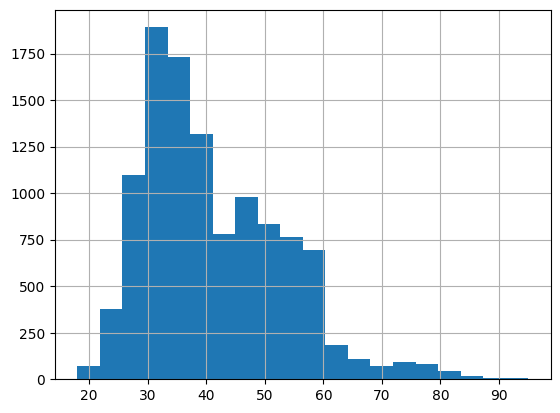

In [20]:
df_original['age'].hist(bins=20)

count    11153.000000
mean        41.236977
std         11.915588
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


<Axes: >

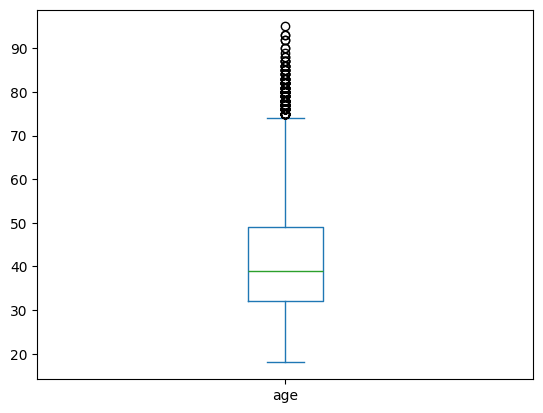

In [60]:
print(df_original['age'].describe())
df_original['age'].plot.box()

#### Balance

count    11163.000000
mean      1528.611484
std       3225.278053
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.500000
max      81204.000000
Name: balance, dtype: float64


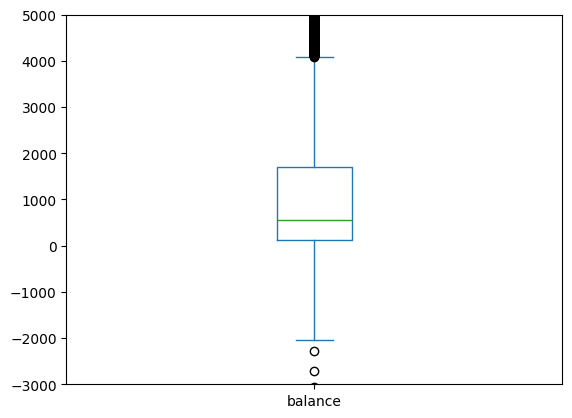

In [62]:
print(df_original['balance'].describe())
df_original['balance'].plot.box()
plt.ylim(-3000, 5000)
plt.show()

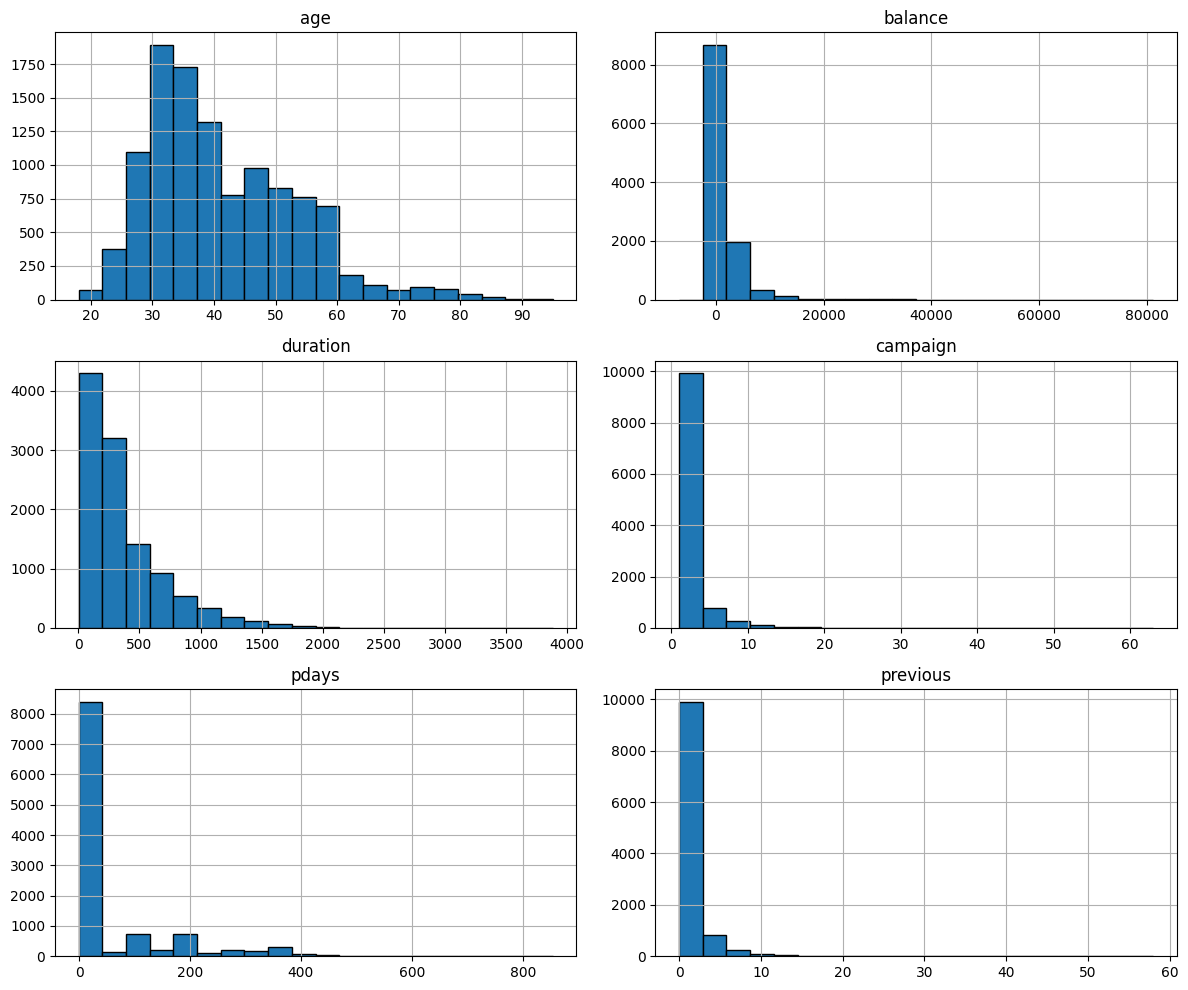

In [ ]:
# Histogramas de variables numéricas
numericas = df_original.select_dtypes(include='number').columns
numericas = numericas.drop(['id', 'day'])

df_original[numericas].hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.tight_layout()
plt.show()

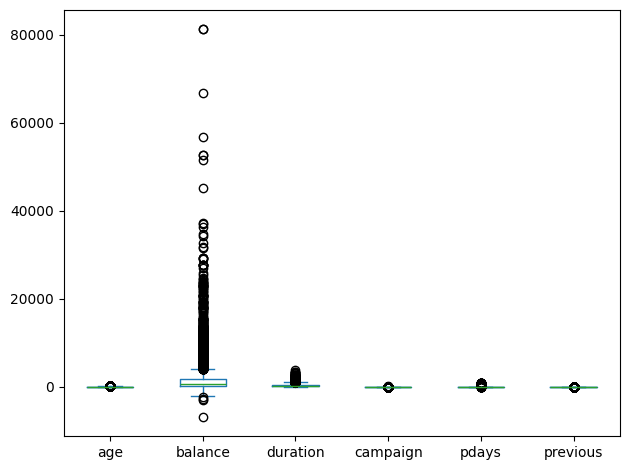

In [42]:
# Boxplots de variables numéricas
df_original[numericas].plot.box()
plt.tight_layout()
plt.show()